In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('../DATA/pennies.jpg')

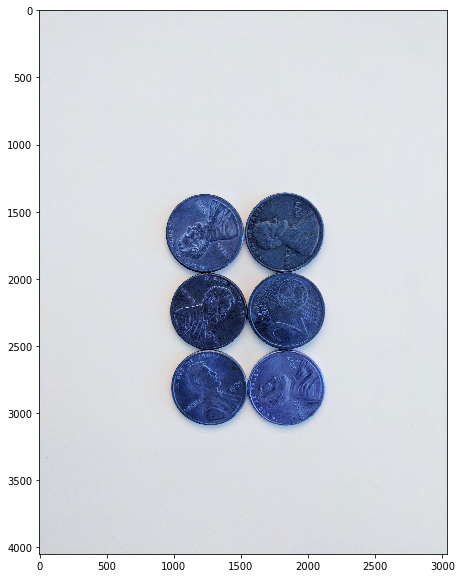

In [4]:
display(sep_coins)

In [5]:
# 1. Median Blur (feature that not need like face on coin)

# 2. Grayscale

# 3. Binary Threshold

# 4. Find Contours

In [6]:
sep_blur = cv2.medianBlur(sep_coins,25)

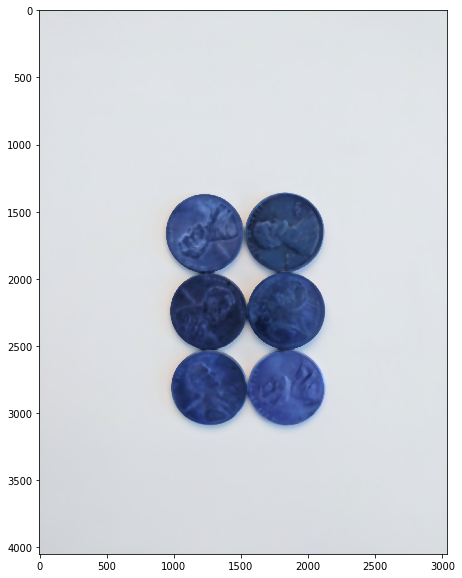

In [7]:
display(sep_blur)

In [8]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

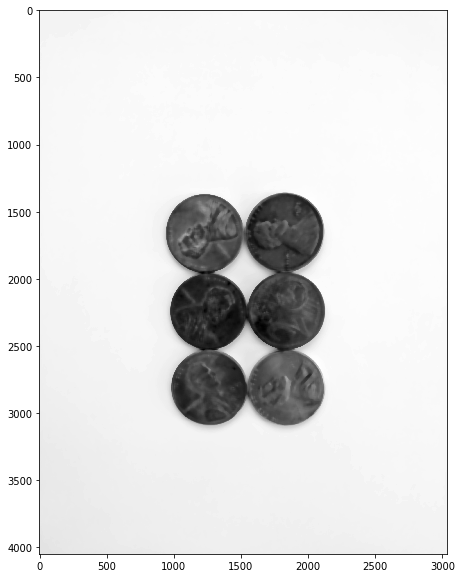

In [9]:
display(gray_sep_coins)

In [10]:
#Binary threshold

ret,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

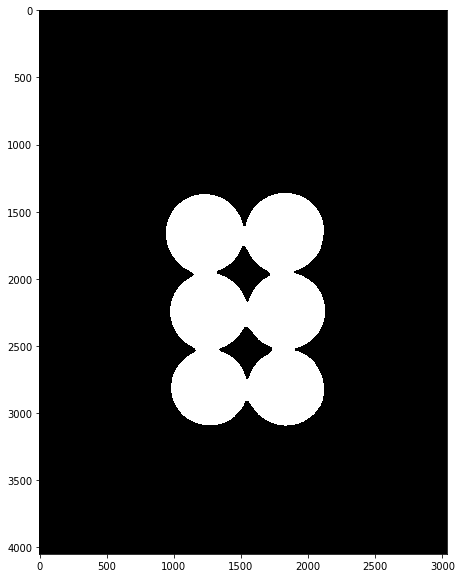

In [11]:
display(sep_thresh)

In [12]:
image,contous,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [13]:
for i in range(len(contous)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contous,i,(255,0,0),10)

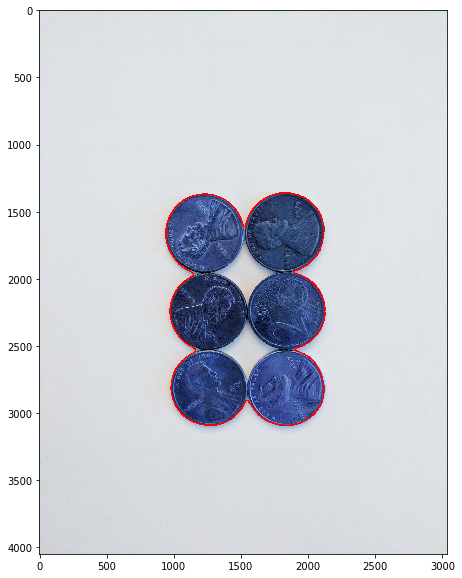

In [14]:
display(sep_coins)

In [15]:
########################
## Part 2
########################

In [16]:
img = cv2.imread('../DATA/pennies.jpg')

In [17]:
img = cv2.medianBlur(img,35)

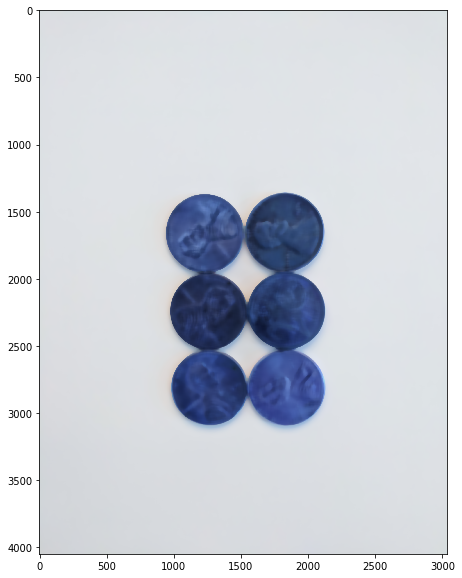

In [18]:
display(img)

In [19]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [25]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

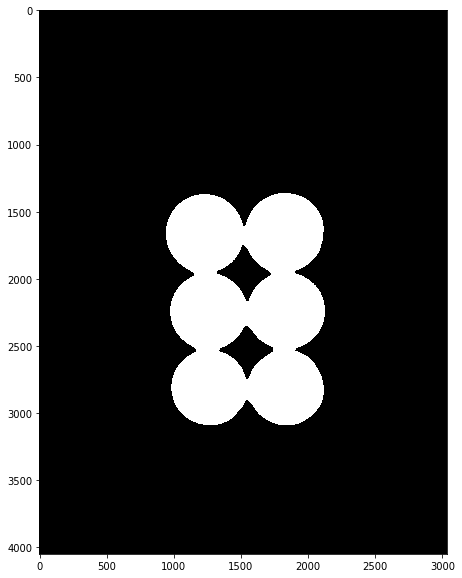

In [26]:
display(thresh)

In [27]:
#Noise removal (OPTIONAL)

In [28]:
kernel = np.ones((3,3),np.uint8)

In [29]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [31]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

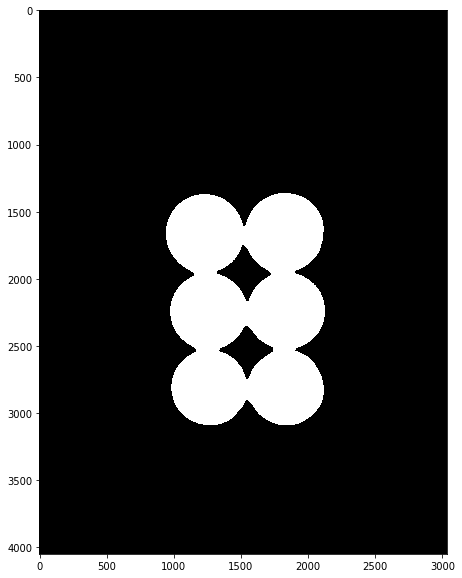

In [32]:
display(opening)

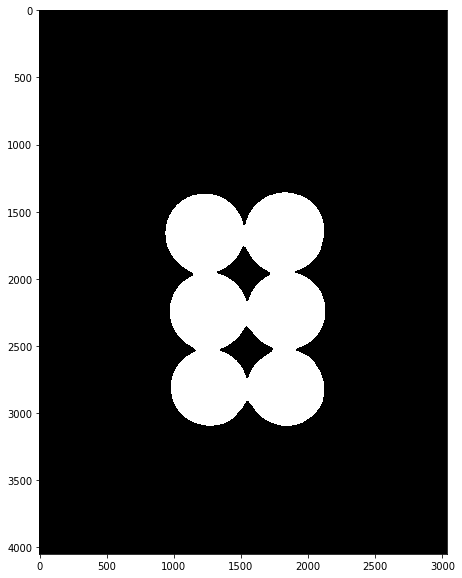

In [44]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg)

In [45]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

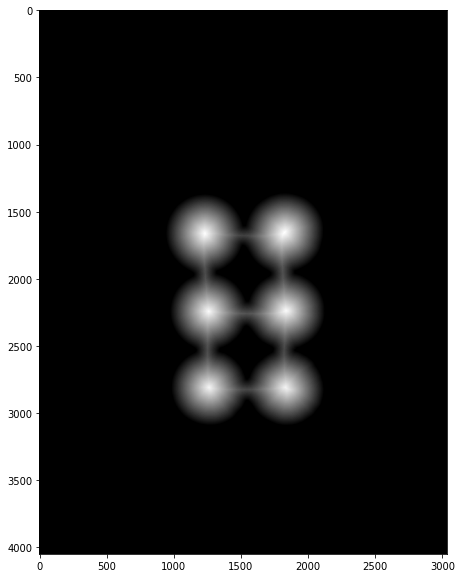

In [46]:
display(dist_transform)

In [35]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

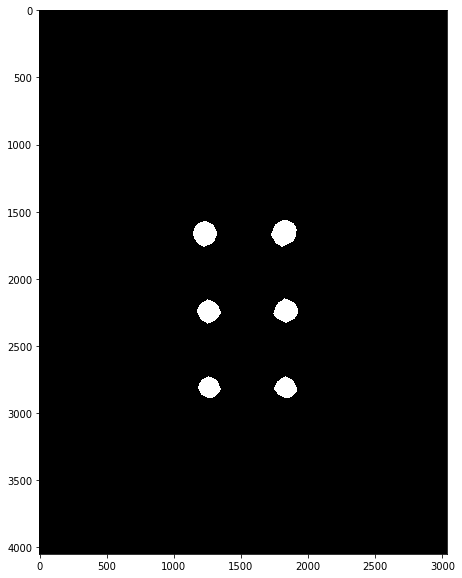

In [36]:
display(sure_fg)

In [47]:
sure_fg = np.uint8(sure_fg)

In [48]:
unknow = cv2.subtract(sure_bg,sure_fg)

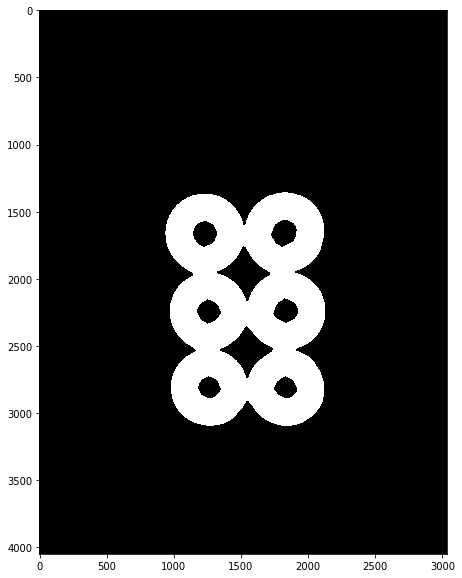

In [51]:
display(unknow)

In [52]:
ret,markers = cv2.connectedComponents(sure_fg)

In [54]:
markers = markers + 1

In [55]:
markers[unknow == 255] = 0 

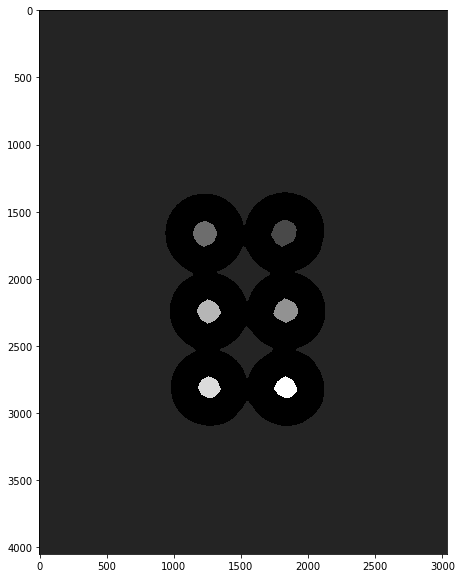

In [56]:
display(markers)

In [57]:
markers = cv2.watershed(img,markers)

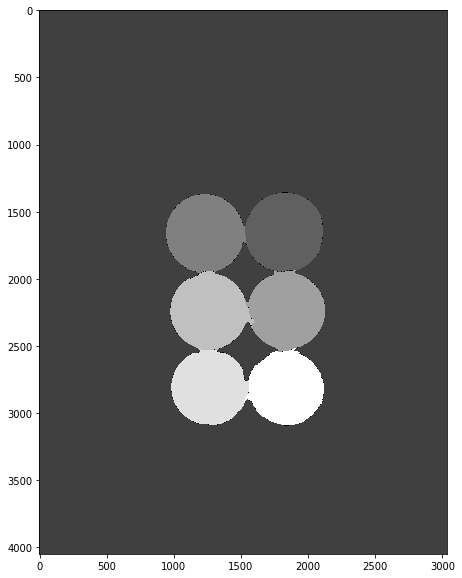

In [58]:
display(markers)

In [59]:
image,contous,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contous)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contous,i,(255,0,0),10)

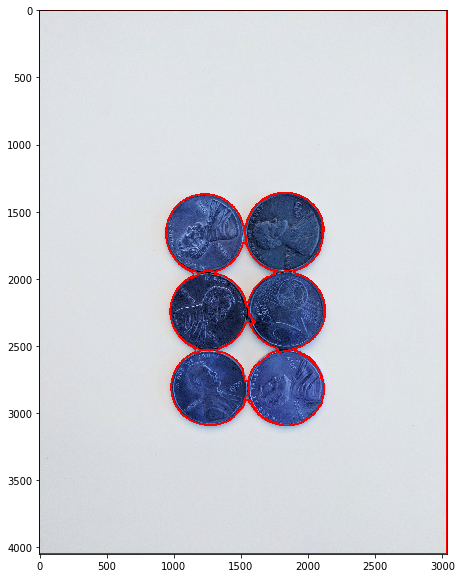

In [60]:
display(sep_coins)